<a href="https://colab.research.google.com/github/Revanthkrr-hub/Text-Generation/blob/master/13_Project_2_TT_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install tensorflow==1.14.0


     |████████████████████████████████| 109.2MB 27kB/s 
     |████████████████████████████████| 3.2MB 38.4MB/s 
     |████████████████████████████████| 491kB 49.6MB/s 
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [3]:

# Standard Data Science Libraries
import pickle
import math
import pandas as pd
import numpy as np
from numpy import array

# Neural Net Preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Neural Net Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

# Neural Net Training
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from pickle import load

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


In [4]:
# Import the data
train= pd.read_csv('/content/train.csv')
# Selecting Edgar Allen Poe as author style to emulate
author= train[train['author'] == 'EAP']["text"]
print('Number of training sentences: ',author.shape[0])

Number of training sentences:  7900


In [5]:
test= pd.read_csv('/content/test.csv')
author_test = test["text"]
print('Number of training sentences: ',author_test.shape[0])

Number of training sentences:  8392


In [6]:
max_words = 50000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(author.values)
sequences = tokenizer.texts_to_sequences(author.values)
print(sequences[:5])

[[19, 2397, 80, 1001, 29, 31, 177, 2, 4073, 1, 1960, 2, 11, 3024, 15, 7, 110, 157, 41, 2146, 3, 481, 4, 1, 149, 2147, 7, 393, 74, 114, 101, 439, 2, 1, 162, 32, 913, 6453, 136, 1, 380], [6, 21, 142, 150, 10, 5, 551, 2148, 319, 28, 16, 15, 20, 8999, 128, 1, 3025, 2398, 30, 171, 2, 1797, 697, 20, 180, 2148, 6454, 12, 33, 188, 2, 1, 869, 243, 522, 1264], [1, 6455, 203, 14, 19, 149, 180, 6456, 6, 1, 1357, 2, 1358, 9000, 3, 83, 2149, 10, 355, 140, 794], [1, 4074, 491, 6, 9001, 28, 11, 158], [7, 287, 9, 36, 48, 22, 73, 4, 644, 9002, 114, 101, 346, 4, 271, 2, 9003, 3, 81, 2, 1, 3026, 2, 6457, 3, 282, 53, 34, 6458, 19, 339, 22, 43, 97, 608, 7, 450, 4, 36, 133, 1191, 88, 12, 133, 71, 914, 1, 759, 3027, 2, 9, 1445, 1359, 18, 760, 12, 4973, 6, 1, 421, 9004, 9005, 7, 214, 9, 36, 48, 22, 3449, 3028, 98, 124, 1192, 4, 1, 92, 9006, 6, 3450, 3, 7, 761, 870, 9, 36, 55, 111, 32]]


In [7]:
text = [item for sublist in sequences for item in sublist]
vocab_size = len(tokenizer.word_index)
print('Vocabulary size in this corpus: ', vocab_size)


Vocabulary size in this corpus:  15713


In [0]:
# Training on 19 words to predict the 20th
sen_len = 20
pred_len = 1
t_len = sen_len - pred_len
seq = []

for i in range(len(text)-sen_len):
    seq.append(text[i:i+sen_len])
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

trainX = []
trainy = []
for i in seq:
    trainX.append(i[:t_len])
    trainy.append(i[-1])

In [9]:
model = Sequential([
    Embedding(vocab_size+1, 50, input_length=t_len),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])
# model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), batch_size=128, epochs=3)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/3
201082/201082 [==============================] - 312s 2ms/sample - loss: 6.8170 - acc: 0.0840
Epoch 2/3
201082/201082 [==============================] - 296s 1ms/sample - loss: 6.3488 - acc: 0.1072
Epoch 3/3
201082/201082 [==============================] - 296s 1ms/sample - loss: 6.1196 - acc: 0.1226


In [0]:
model.save('model_weights.hdf5')

In [12]:
model_2 = Sequential([
    Embedding(vocab_size+1, 50, input_length=t_len),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dropout(0.1),
    Dense(vocab_size, activation='softmax')
])

# model_2.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model_2.fit(np.asarray(trainX),
#          pd.get_dummies(np.asarray(trainy)),
#          epochs = 300,
#          batch_size = 
128,
#          callbacks = callbacks_list,
#          verbose = 1)


(128,)

In [0]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.load_weights('/content/model_2_weights_colab.hdf5')

In [0]:

model_3 = Sequential([
    Embedding(vocab_size+1, 50, input_length=t_len),
    LSTM(150, return_sequences=True),
    LSTM(150),
    Dense(150, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [0]:
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.load_weights('/content/model_3_weights_colab.hdf5')


In [16]:
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


# define model
model_4 = Sequential([
    Embedding(vocab_size+1, 50, input_length=t_len),
    Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1),
    GlobalMaxPooling1D(),
    Dropout(0.2),
    Dense(150, activation='relu'),
    Dense(vocab_size, activation='softmax')
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_4.fit(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), batch_size=128, epochs=3)




201082/201082 [==============================] - 205s 1ms/step - loss: 7.0042 - acc: 0.0735
Epoch 2/3
201082/201082 [==============================] - 205s 1ms/step - loss: 6.8000 - acc: 0.0745
Epoch 3/3
201082/201082 [==============================] - 204s 1ms/step - loss: 6.7058 - acc: 0.0856


In [0]:
model_4.save('model4_weights.hdf5')  


In [19]:
from sklearn import metrics
scores1 = model.evaluate(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

scores2 = model_2.evaluate(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

scores3 = model_3.evaluate(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

scores4 = model_4.evaluate(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Accuracy: 13.10%
Accuracy: 38.48%
Accuracy: 64.06%
Accuracy: 10.27%


In [0]:
def gen(model,seq,max_len = 20):
    t_sentence = tokenizer.texts_to_sequences([seq])
    max_len = max_len+len(t_sentence[0])
    while len(t_sentence[0]) < max_len:
        padded_sentence = pad_sequences(t_sentence[-19:],maxlen=19)
        op = model.predict(np.asarray(padded_sentence).reshape(1,-1))
        t_sentence[0].append(op.argmax()+1)
        
    return " ".join(map(lambda x : reverse_word_map[x],t_sentence[0]))

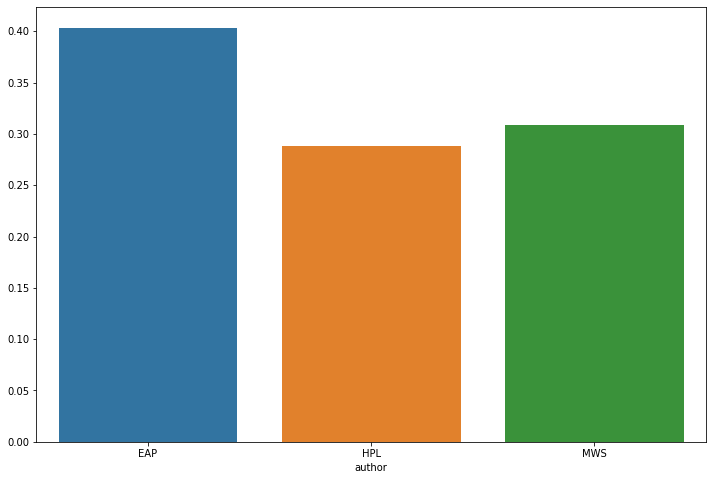

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

dist = train.groupby(["author"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

In [0]:
result= [model,model_2,model_3,model_4]
def test_models(test_string,sequence_length= 50, result = result):
  '''Generates output given input test_string up to sequence_length'''
  print('Input String: ', test_string)
  for counter,model in enumerate(result):
    print("Model ", counter+1, ":")
    print(gen(model,test_string,sequence_length))
  pass


In [22]:
test_models('This process however afforded me', 10)

Input String:  This process however afforded me
Model  1 :
this process however afforded me to the most and and the most and and the
Model  2 :
this process however afforded me most well echoed one who had a very idea which
Model  3 :
this process however afforded me good difficulty whatever long vaulting are no more subject to
Model  4 :
this process however afforded me the the the the the the the the the the


In [23]:
test_models(author_test.iloc[8390])


Input String:  Be this as it may, I now began to feel the inspiration of a burning hope, and at length nurtured in my secret thoughts a stern and desperate resolution that I would submit no longer to be enslaved.
Model  1 :
be this as it may i now began to feel the inspiration of a burning hope and at length nurtured in my secret thoughts a stern and desperate resolution that i would submit no longer to be the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most and and the most
Model  2 :
be this as it may i now began to feel the inspiration of a burning hope and at length nurtured in my secret thoughts a stern and desperate resolution that i would submit no longer to be the most oil of water is not more more than the most idea of the most gazette who had been more a matter of great letters ' strenuous son out of the oil of bob a few words of music